In [1]:
words = open('names.txt', 'r').read().split()

In [2]:
words[0:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [7]:
for w in words[:1]:
    chs = ['<S>' ] + list(w) + ['<E>']
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a


In [8]:
b = {}
for w in words:
    chs  = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1


In [9]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [16]:
import torch


In [17]:
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['.'] = 26

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        i1 = stoi[ch1]
        i2 = stoi[ch2]
        N[i1, i2] += 1



In [18]:
itos = {i:s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '.'}

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

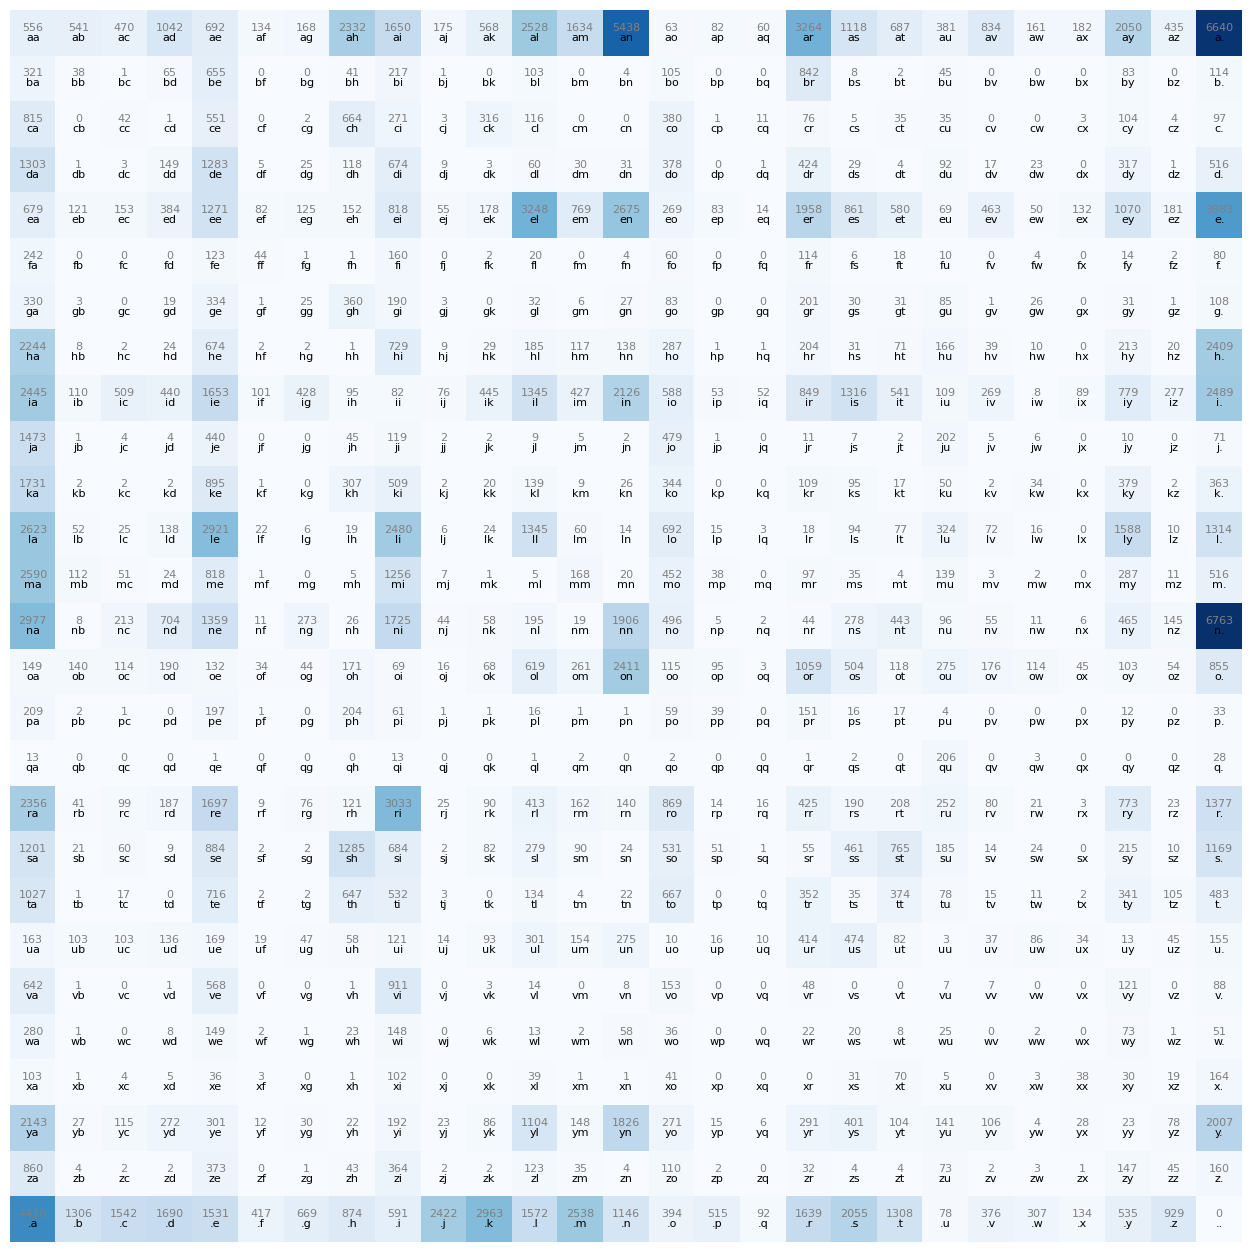

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='top', color='black', fontsize=8)
        plt.text(j, i, N[i, j].item(), ha='center', va='bottom', color='gray', fontsize=8)
plt.axis('off')

In [120]:
p = N.float() / N.sum(1, keepdim=True)
P = (N+1).float() / N.sum(1, keepdim=True)


In [27]:

torch.multinomial(p, 10, replacement=True, generator=g)

tensor([[17, 23, 18,  6, 22, 22,  7, 22, 20, 12],
        [24,  9,  1,  3,  9, 13, 10,  3,  9, 14],
        [ 1, 20, 20, 12,  7, 14,  8,  3, 10,  4]])

In [108]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    ix = 0 
    while True:
        p = P[ix]
        p = p / p.sum()
        ix = torch.multinomial(p, 1, replacement=True).item()
        print(itos[ix], end='')
        if ix == 26:
            print('\n')
            break

h.

l.

ion.

yssian.

hanivithi.

hi.

.

milatocichymanyleeridesodai.

rijan.

s.

y.

hone.

ndon.

jettayn.

liaqule.

n.

rsanza.

mihire.

.

dleranaynslen.



In [131]:
log_likelihood = 0.0
n = 0
for w in ['hello', 'world', 'python', 'bigram', 'language']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        i1 = stoi[ch1]
        i2 = stoi[ch2]
        prob = P[i1, i2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(f'Log likelihood: {log_likelihood:.4f}')
nll = -log_likelihood
print(f'Negative log likelihood: {nll:.4f}')
nnll = nll / n
print(f'Negative log likelihood per bigram: {nnll:.4f}')
print(f'Number of bigrams: {n}')

.h: 0.0273 -3.6003
he: 0.0886 -2.4233
el: 0.1591 -1.8383
ll: 0.0964 -2.3389
lo: 0.0496 -3.0028
o.: 0.1079 -2.2266
.w: 0.0096 -4.6444
wo: 0.0398 -3.2232
or: 0.1336 -2.0129
rl: 0.0326 -3.4235
ld: 0.0100 -4.6093
d.: 0.0941 -2.3637
.p: 0.0161 -4.1284
py: 0.0127 -4.3685
yt: 0.0107 -4.5337
th: 0.1163 -2.1513
ho: 0.0378 -3.2750
on: 0.3040 -1.1907
n.: 0.3691 -0.9968
.b: 0.0408 -3.1990
bi: 0.0824 -2.4959
ig: 0.0242 -3.7199
gr: 0.1048 -2.2555
ra: 0.1856 -1.6842
am: 0.0483 -3.0313
m.: 0.0778 -2.5531
.l: 0.0491 -3.0138
la: 0.1880 -1.6714
an: 0.1605 -1.8294
ng: 0.0150 -4.2030
gu: 0.0446 -3.1094
ua: 0.0523 -2.9505
ag: 0.0050 -5.3008
ge: 0.1738 -1.7496
e.: 0.1951 -1.6344
Log likelihood: -100.7529
Negative log likelihood: 100.7529
Negative log likelihood per bigram: 2.8787
Number of bigrams: 35


In [138]:
# create the training set of bigrams (x, y) pairs

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [139]:
xs

tensor([26,  4, 12, 12,  0])

In [140]:
ys

tensor([ 4, 12, 12,  0, 26])